#Recognizing sentiment in text

Importing libraries

In [36]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [38]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2022-10-07 14:49:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2022-10-07 14:49:18 (143 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [39]:
#loading the dataset
#source : https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

#create lists
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in data:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [40]:
###---------- not ideal cause it's seeing the test data
#-tokenizer = Tokenizer(oov_token="<OOV>")

#create tokens for every word
#-tokenizer.fit_on_texts(sentences)

#see tokens in word index
#-word_index = tokenizer.word_index

#turn sentences in sequences of tokens
#-sequences = tokenizer.texts_to_sequences(sentences)

#pad seq of tok in to same length
#-padded = pad_sequences(sequences, padding = 'post')

#-print(padded[0])
#-print(padded.shape)

In [41]:
#Training and the test set

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [42]:
# Proper way to create training and test data 

#instantiate tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
#fit tokenizer on trainig sentences
tokenizer. fit_on_texts(training_sentences)

word_index = tokenizer.word_index

#creating training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
#pad for training sequences
#--------pad_sequences: used to ensure that all sequences in a list have the same length
training_padded = pad_sequences(training_sequences, maxlen= max_length, padding= padding_type, truncating=trunc_type)

#Similarly for test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen= max_length, padding= padding_type, truncating=trunc_type)





###Embedding 
Extending this in  
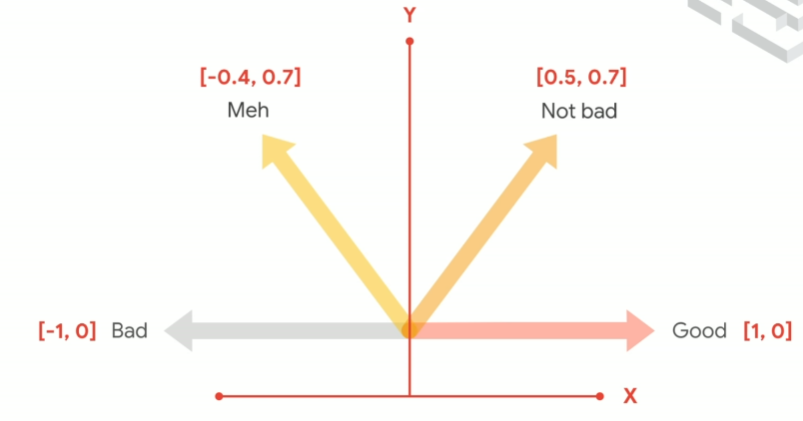
Multidimensional space instead of two


Words labelled with sentiments ex: sarcastic / not sarcastic are plotted in multiple dimensions
> When we train, we learn in what direction these multidimensional spaces should look like
>>Example: words in sarcastic sentences will have a strong component in sarcastic direction  

##**EMBDEDDING**
Loading more sentences in the network for training these directions might change
>  for fully trained network 
> - give set of words 
> - look vectors for these
> - sum them up - idea for sentiment





In [43]:

model = tf.keras.Sequential([
    #top layer embedding 
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # pool by gap summing up vectors
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [47]:
#for Tensorflow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [49]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.0265 - accuracy: 0.9931 - val_loss: 1.0410 - val_accuracy: 0.8137 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 3s - loss: 0.0237 - accuracy: 0.9934 - val_loss: 1.0733 - val_accuracy: 0.8131 - 3s/epoch - 4ms/step
Epoch 3/30
625/625 - 3s - loss: 0.0234 - accuracy: 0.9937 - val_loss: 1.0859 - val_accuracy: 0.8106 - 3s/epoch - 5ms/step
Epoch 4/30
625/625 - 3s - loss: 0.0224 - accuracy: 0.9938 - val_loss: 1.1155 - val_accuracy: 0.8104 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 3s - loss: 0.0210 - accuracy: 0.9941 - val_loss: 1.1636 - val_accuracy: 0.8114 - 3s/epoch - 4ms/step
Epoch 6/30
625/625 - 3s - loss: 0.0181 - accuracy: 0.9952 - val_loss: 1.2003 - val_accuracy: 0.8104 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 3s - loss: 0.0177 - accuracy: 0.9955 - val_loss: 1.2079 - val_accuracy: 0.8073 - 3s/epoch - 5ms/step
Epoch 8/30
625/625 - 2s - loss: 0.0176 - accuracy: 0.9953 - val_loss: 1.2708 - val_accuracy: 0.8071 - 2s/epoch - 4ms/step
Epoch 9/30
625/625 - 3s 

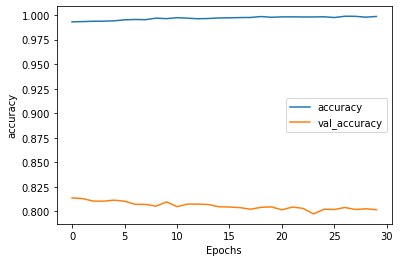

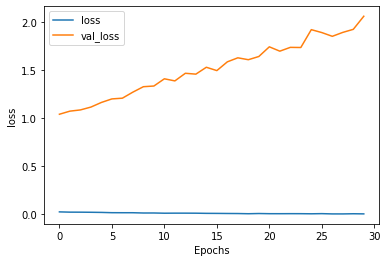

In [51]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [52]:
sentence = ["granny starting to fear spiders in the garden might be real", 
            "game of thrones season finale showing this sunday night"]
#tokenizer to convert to sequences
sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded))

[[9.9745858e-01]
 [4.3143454e-13]]
